<a href="https://colab.research.google.com/github/withMichelle/programmers_kdt_II/blob/week3/5_Day5_mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#matplotlib inline 

# 1.Netflix

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows
!unzip '*.zip'


netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
!ls

netflix-shows.zip  netflix_titles.csv  sample_data


In [ ]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


## 한국 작품은 총 얼마나 있는가?


In [ ]:
netflix[netflix['country']=='South Korea'].agg({'show_id':'count'})

show_id    183
dtype: int64

## 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가? 

In [ ]:
raw = netflix.groupby('country').agg({'show_id':'count'})
answer = raw.sort_values(by='show_id',ascending=False)
answer.head(1)

,show_id
country,
United States,2555


# 2. 가즈아!!!

## 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프


In [ ]:
bitcoin = pd.read_csv('/content/BitCoin.csv')

df = bitcoin.sort_values(by='Date').drop('Unnamed: 0', axis=1)
df.head(1)

,Date,Open,High,Low,Close,Volume,Market Cap
1605,2013-01-05,139.0,139.89,107.72,116.99,8026718.801,1542820000


In [ ]:
df['ma5'] = df['Open'].rolling(5).mean()
df_graph = df[df['Date'].between('2016-06-01','2017-06-30')]
df_graph.head()

,Date,Open,High,Low,Close,Volume,Market Cap,ma5
625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000,499.006
594,2016-06-02,386.59,386.63,372.39,376.52,49249300.0,5865740000,481.718
565,2016-06-03,400.52,411.91,395.78,407.71,91212500.0,6121400000,456.326
534,2016-06-04,424.28,424.53,422.73,423.41,59091000.0,6533260000,435.488
504,2016-06-05,447.94,461.38,447.07,459.60,72796800.0,6947800000,418.238


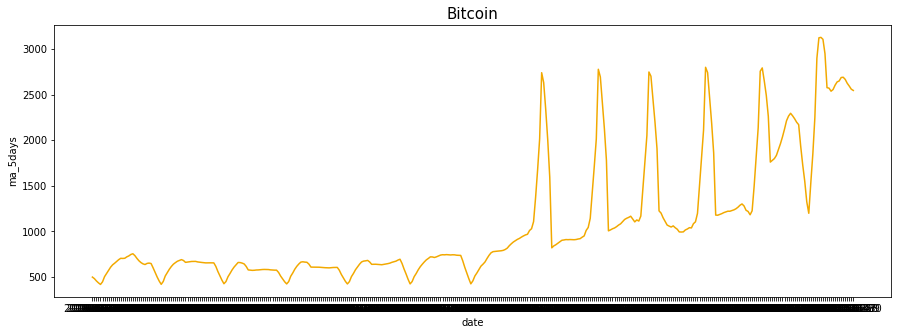

In [ ]:

# 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
# x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
# 이동평균의 기준은 Open Column으로 계산합니다.
# 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
# 💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

plt.figure(figsize=(15,5))
plt.plot(df_graph.Date, df_graph.ma5, color='#f2a900')

plt.xlabel('date')
plt.ylabel('ma_5days')
plt.title('Bitcoin', fontsize=15)
plt.show()

## 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.



In [ ]:
ether = pd.read_csv('/content/ETH_day.csv')

df = ether.sort_values(by='Date')
df.head(1)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1437,2016-05-09,ETHUSD,12.0,12.0,9.36,9.98,1317.9,12885.06


In [ ]:
df['ma5'] = df['Open'].rolling(5).mean()
df_graph_ether = df[df['Date'].between('2016-06-01','2017-06-30')]
df_graph_ether.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,ma5
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81,12.514
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38,13.026
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19,13.444
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39,13.742
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67,13.982


In [ ]:
선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
이동평균의 기준은 Open Column으로 계산합니다.
이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.


# 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
# x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
# 이동평균의 기준은 Open Column으로 계산합니다.
# 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
# 💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.


plt.figure(figsize=(15,5))
plt.plot(df_graph.Date, df_graph.ma5, color='#f2a900')

plt.xlabel('date')
plt.ylabel('ma_5days')
plt.title('Bitcoin', fontsize=15)
plt.show()

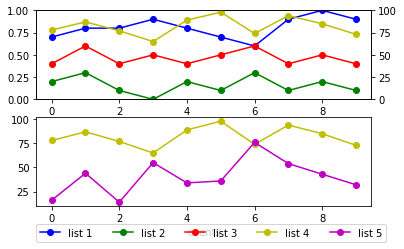

In [ ]:
import matplotlib.pyplot as plt

# Some sample lists
l1 = [0.7,0.8,0.8,0.9,0.8,0.7,0.6,0.9,1.0,0.9]
l2 = [0.2,0.3,0.1,0.0,0.2,0.1,0.3,0.1,0.2,0.1]
l3 = [0.4,0.6,0.4,0.5,0.4,0.5,0.6,0.4,0.5,0.4]

l4 = [78,87,77,65,89,98,74,94,85,73]
l5 = [16,44,14,55,34,36,76,54,43,32]

# Make a figure
fig = plt.figure()

# Make room for legend at bottom
fig.subplots_adjust(bottom=0.2)

# The axes for your lists 1-3
ax1 = fig.add_subplot(211)
# A twin axis for list 4. This shares the x axis, but has a separate y axis
ax2 = ax1.twinx()

# Plot lines 1-3
line1 = ax1.plot(l1,'bo-',label='list 1')
line2 = ax1.plot(l2,'go-',label='list 2')
line3 = ax1.plot(l3,'ro-',label='list 3')

# Plot line 4
line4 = ax2.plot(l4,'yo-',label='list 4')

# Some sensible y limits
ax1.set_ylim(0,1)
ax2.set_ylim(0,100)

# Your second subplot, for lists 4&5
ax3 = fig.add_subplot(212)

# Plot lines 4&5
ax3.plot(l4,'yo-',label='list 4')
line5 = ax3.plot(l5,'mo-',label='list 5')

# To get lines 1-5 on the same legend, we need to 
# gather all the lines together before calling legend
lines = line1+line2+line3+line4+line5
labels = [l.get_label() for l in lines]

# giving loc a tuple in axes-coords. ncol=5 for 5 columns
ax3.legend(lines, labels, loc=(0,-0.4), ncol=5)

ax3.set_xlabel('events')

# Display the figure
plt.show()

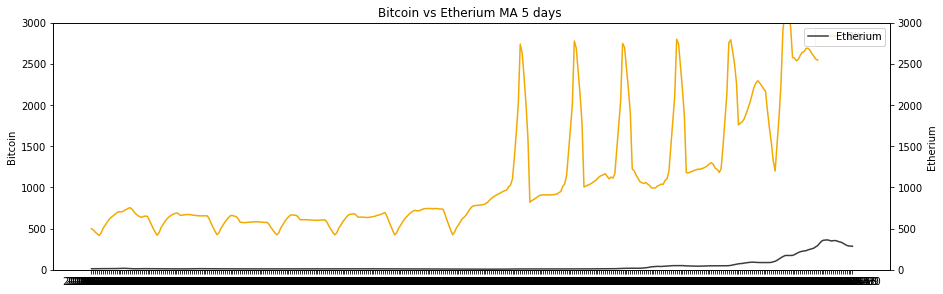

In [ ]:

fig = plt.figure(figsize=(15,10))

# The axes for your lists 1-2
ax1 = fig.add_subplot(211)
ax2 = ax1.twinx()

ax1.plot(df_graph.Date, df_graph.ma5,color='#f2a900', label='Bitcoin')
ax2.plot(df_graph_ether.Date, df_graph_ether.ma5, color='#3c3c3d', label='Etherium')

ax2.set_ylim(0,3000)

ax1.set_ylabel('Bitcoin')
ax2.set_ylabel('Etherium')
ax2.set_xlabel('date')

plt.title('Bitcoin vs Etherium MA 5 days ')
ax1.legend()
ax2.legend()
plt.show()
